In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
import folium
import requests as req
import json
import time
from datetime import datetime

In [ ]:
url = "https://api.nytimes.com/svc/books/v3/lists/best-sellers/history.json?&api-key="
api_key = "HkAJX93noRBfDJvXiaCYBSBWEMIb2all"

articles = []
for i in range(0,3000,20):
    url = f'https://api.nytimes.com/svc/books/v3/lists/best-sellers/history.json?&api-key=HkAJX93noRBfDJvXiaCYBSBWEMIb2all&offset={i}'
    res = req.get(url).json()
    docs = res['results']
    for doc in docs:
        dic = {}
        dic['Title'] = doc['title']
        dic['Publisher'] = doc['publisher']
        dic['Author'] = doc['author']
        dic['Description'] = doc['description']
        dic['Contributor'] = doc['contributor']
        dic['Price'] = doc['price']
        dic['Ranks_history'] = doc['ranks_history']
        
        articles.append(dic)
        
    time.sleep(6)
    
data = pd.DataFrame(articles)
data

In [ ]:
data.to_excel('Best_Seller1.xlsx')

In [40]:
def rank_week(val):
    ptr = r"'weeks_on_list': (\d+)"
    ptr = r"'rank_last_week': (\d+)"
    match = re.search(ptr,val)
    if match:
        return match[1]
    else:
        return None
    
def WOLandRLW(val):
    ptr = r"weeks_on_list': (\d+)"
    match = re.search(ptr,val)
    if match:
        return match
    else:
        return None

def publish_year(val):
    ptr = r"published_date': '(\d{4})"
    match = re.search(ptr,val)
    if match:
        return match[1]
    else:
        return None

def seller_year(val):
    ptr = r"bestsellers_date': '(\d{4})"
    match = re.search(ptr,val)
    if match:
        return match[1]
    else:
        return None
    
def publish_month(val):
    ptr = r"(-\d+-)"
    match = re.search(ptr,val)
    if match:
        return match[1][2]
    else:
        return None

def months(val):
    if val == 1:
        return "Jan"
    elif val == 2:
        return "Feb"
    elif val == 3:
        return "Mar"
    elif val == 4:
        return "Apr"
    elif val == 5:
        return "May"
    elif val == 6:
        return "Jun"
    elif val == 7:
        return "Jul"
    elif val == 8:
        return "Aug"
    elif val == 9:
        return "Sep"
    elif val == 10:
        return "Oct"
    elif val == 11:
        return "Nov"
    elif val == 12:
        return "Dec"
    else:
        return "NaN"
    
def Qtrs(val):
    if val >= 1 and val <= 3:
        return "Qtr1"
    elif val >= 4 and val <= 6:
        return "Qtr2"
    elif val >= 7 and val <= 9.0:
        return "Qtr3"
    elif val >= 10 and val <=12:
        return "Qtr4"
    else:
        return "NaN" 
    
def Price_grp(val):
    if val >=5.0 and val <= 25.0:
        return "5 to 25"
    elif val >=26.0 and val <=50.0:
        return "26 to 50"
    elif val >= 51.0 and val <=75.0:
        return "51 to 75"
    elif val >= 76.0:
        return "76 to max"
    else:
        return "0 to 4"

In [41]:
best_seller = pd.read_excel(r'E:\Python Program\Jupyter Notebook\Assignment\API\Best_Seller.xlsx')

In [42]:
best_seller

,Unnamed: 0,Title,Publisher,Author,Description,Contributor,Price,Ranks_history
0,0,"""I GIVE YOU MY BODY ...""",Dell,Diana Gabaldon,The author of the Outlander novels gives tips ...,by Diana Gabaldon,0.0,"[{'primary_isbn10': '0399178570', 'primary_isb..."
1,1,"""MOST BLESSED OF THE PATRIARCHS""",Liveright,Annette Gordon-Reed and Peter S Onuf,A character study that attempts to make sense ...,by Annette Gordon-Reed and Peter S. Onuf,0.0,"[{'primary_isbn10': '0871404427', 'primary_isb..."
2,2,"""YOU JUST NEED TO LOSE WEIGHT""",Beacon,Aubrey Gordon,The co-host of the podcast “Maintenance Phase”...,by Aubrey Gordon,0.0,"[{'primary_isbn10': '0807006475', 'primary_isb..."
3,3,#ASKGARYVEE,HarperCollins,Gary Vaynerchuk,The entrepreneur expands on subjects addressed...,by Gary Vaynerchuk,0.0,"[{'primary_isbn10': '0062273124', 'primary_isb..."
4,4,#GIRLBOSS,Portfolio/Penguin/Putnam,Sophia Amoruso,An online fashion retailer traces her path to ...,by Sophia Amoruso,0.0,"[{'primary_isbn10': '1591847931', 'primary_isb..."
...,...,...,...,...,...,...,...,...
1995,1995,"American Bloomsbury: Louisa May Alcott, Ralph ...",NaN,Susan Cheever,NaN,NaN,0.0,[]
1996,1996,AMERICAN BORN CHINESE,Square Fish,Gene Luen Yang,"When his family moves to the suburbs, Jin Wang...",by Gene Luen Yang,0.0,"[{'primary_isbn10': '0312384483', 'primary_isb..."
1997,1997,AMERICAN CARNAGE,Harper,Tim Alberta,Politico Magazine’s chief political correspond...,by Tim Alberta,0.0,"[{'primary_isbn10': '006289644X', 'primary_isb..."
1998,1998,American Cassandra: The Life of Dorothy Thompson,NaN,Peter Kurth,NaN,NaN,0.0,[]


In [43]:
best_seller = best_seller.drop(['Unnamed: 0'],axis=1)

In [44]:
clean_data = best_seller

In [45]:
clean_data['Publish_Year'] = clean_data['Ranks_history'].apply(publish_year)
clean_data['Best_Seller_Year'] = clean_data['Ranks_history'].apply(seller_year)
clean_data['Publish_Month'] = clean_data['Ranks_history'].apply(publish_month)
clean_data['Best_Seller_Month'] = clean_data['Ranks_history'].apply(publish_month)
clean_data['Publish_Month'].fillna({'Publish_Month':0},inplace=True)
clean_data['Publish_Month'] = clean_data['Publish_Month'].astype('float64')
clean_data['Best_Seller_Month'] = clean_data['Best_Seller_Month'].astype('float64')
clean_data['Quarters'] = clean_data['Publish_Month'].apply(Qtrs)
clean_data['Publish_Month'] = clean_data['Publish_Month'].apply(months)
clean_data['Best_Seller_Month'] = clean_data['Best_Seller_Month'].apply(months)
clean_data['Price_Group'] = clean_data['Price'].apply(Price_grp)

In [46]:
clean_data = clean_data.drop(['Ranks_history'],axis=1)

In [47]:
df = clean_data

In [48]:
df

,Title,Publisher,Author,Description,Contributor,Price,Publish_Year,Best_Seller_Year,Publish_Month,Best_Seller_Month,Quarters,Price_Group
0,"""I GIVE YOU MY BODY ...""",Dell,Diana Gabaldon,The author of the Outlander novels gives tips ...,by Diana Gabaldon,0.0,2016,2016,Sep,Sep,Qtr3,0 to 4
1,"""MOST BLESSED OF THE PATRIARCHS""",Liveright,Annette Gordon-Reed and Peter S Onuf,A character study that attempts to make sense ...,by Annette Gordon-Reed and Peter S. Onuf,0.0,2016,2016,May,May,Qtr2,0 to 4
2,"""YOU JUST NEED TO LOSE WEIGHT""",Beacon,Aubrey Gordon,The co-host of the podcast “Maintenance Phase”...,by Aubrey Gordon,0.0,2023,2023,Jan,Jan,Qtr1,0 to 4
3,#ASKGARYVEE,HarperCollins,Gary Vaynerchuk,The entrepreneur expands on subjects addressed...,by Gary Vaynerchuk,0.0,2016,2016,Apr,Apr,Qtr2,0 to 4
4,#GIRLBOSS,Portfolio/Penguin/Putnam,Sophia Amoruso,An online fashion retailer traces her path to ...,by Sophia Amoruso,0.0,2016,2016,Mar,Mar,Qtr1,0 to 4
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"American Bloomsbury: Louisa May Alcott, Ralph ...",NaN,Susan Cheever,NaN,NaN,0.0,None,None,NaN,NaN,NaN,0 to 4
1996,AMERICAN BORN CHINESE,Square Fish,Gene Luen Yang,"When his family moves to the suburbs, Jin Wang...",by Gene Luen Yang,0.0,2020,2020,Sep,Sep,Qtr3,0 to 4
1997,AMERICAN CARNAGE,Harper,Tim Alberta,Politico Magazine’s chief political correspond...,by Tim Alberta,0.0,2019,2019,Aug,Aug,Qtr3,0 to 4
1998,American Cassandra: The Life of Dorothy Thompson,NaN,Peter Kurth,NaN,NaN,0.0,None,None,NaN,NaN,NaN,0 to 4


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Publisher          1110 non-null   object 
 2   Author             1999 non-null   object 
 3   Description        879 non-null    object 
 4   Contributor        1110 non-null   object 
 5   Price              2000 non-null   float64
 6   Publish_Year       442 non-null    object 
 7   Best_Seller_Year   442 non-null    object 
 8   Publish_Month      2000 non-null   object 
 9   Best_Seller_Month  2000 non-null   object 
 10  Quarters           2000 non-null   object 
 11  Price_Group        2000 non-null   object 
dtypes: float64(1), object(11)
memory usage: 187.6+ KB


In [50]:
top_publisher = df.groupby(df['Publisher']).count().sort_values('Title',ascending=False).head(10)

In [51]:
top_publisher

,Title,Author,Description,Contributor,Price,Publish_Year,Best_Seller_Year,Publish_Month,Best_Seller_Month,Quarters,Price_Group
Publisher,,,,,,,,,,,
Simon & Schuster,34,34,25,34,34,15,15,34,34,34,34
Grand Central,25,25,19,25,25,12,12,25,25,25,25
Ballantine,25,25,17,25,25,11,11,25,25,25,25
Mira,23,23,19,23,23,6,6,23,23,23,23
Seven Seas Entertainment,22,22,22,22,22,13,13,22,22,22,22
Random House,20,20,18,20,20,12,12,20,20,20,20
"Little, Brown",18,18,14,18,18,10,10,18,18,18,18
DC Comics,17,17,17,17,17,3,3,17,17,17,17
Yen Press,16,16,16,16,16,3,3,16,16,16,16


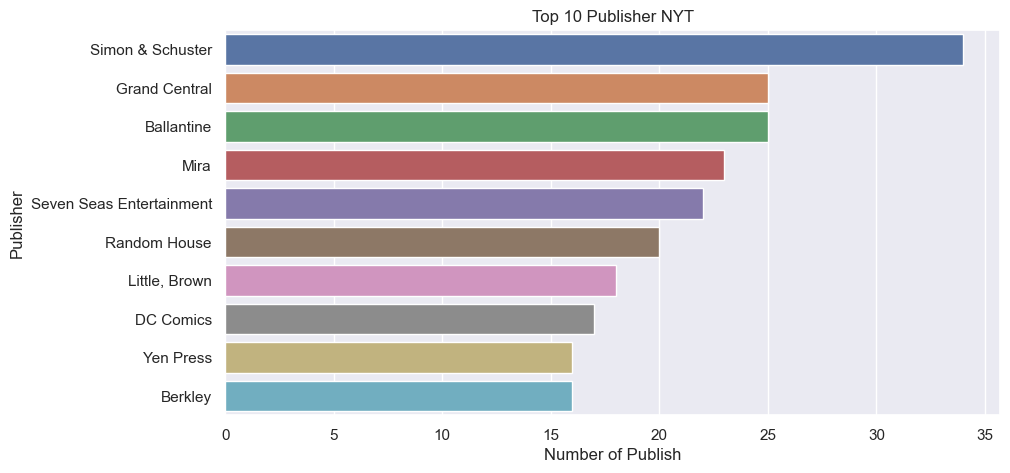

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_publisher.Title,y=top_publisher.Title.index)

plt.ylabel('Publisher');
plt.xlabel('Number of Publish')
plt.title('Top 10 Publisher NYT');

In [53]:
Publish_Year = df.groupby(df['Publish_Year']).count().sort_values('Publish_Year',ascending=True)

In [54]:
Publish_Year

,Title,Publisher,Author,Description,Contributor,Price,Best_Seller_Year,Publish_Month,Best_Seller_Month,Quarters,Price_Group
Publish_Year,,,,,,,,,,,
2009,4,4,4,2,4,4,4,4,4,4,4
2010,3,3,3,2,3,3,3,3,3,3,3
2011,15,15,15,10,15,15,15,15,15,15,15
2012,18,18,18,13,18,18,18,18,18,18,18
2013,25,25,25,22,25,25,25,25,25,25,25
2014,38,38,38,35,38,38,38,38,38,38,38
2015,50,50,50,39,50,50,50,50,50,50,50
2016,49,49,49,44,49,49,49,49,49,49,49
2017,24,24,24,20,24,24,24,24,24,24,24


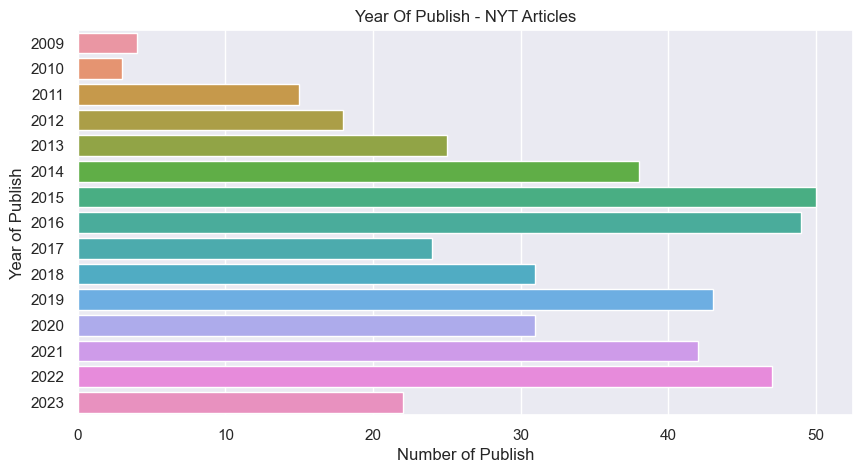

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x=Publish_Year.Title,y=Publish_Year.Title.index)

plt.ylabel('Year of Publish');
plt.xlabel('Number of Publish')
plt.title('Year Of Publish - NYT Articles');

In [56]:
df['Quarters'].count()

2000

([<matplotlib.patches.Wedge at 0x1108680e400>,
 [Text(-0.8929557067627254, 0.6423629081445174, 'NaN'),
  Text(0.6325059044813707, -0.8999645997461253, 'Qtr1'),
  Text(0.9697059122545286, -0.5192980297850288, 'Qtr2'),
  Text(1.0864572024462793, -0.17207773607473004, 'Qtr3')],
 [Text(-0.4870667491433047, 0.35037976807882765, '80.2%'),
  Text(0.34500322062620215, -0.49088978167970465, '9.2%'),
  Text(0.5289304975933792, -0.28325347079183383, '5.7%'),
  Text(0.5926130195161523, -0.0938605833134891, '5.0%')])

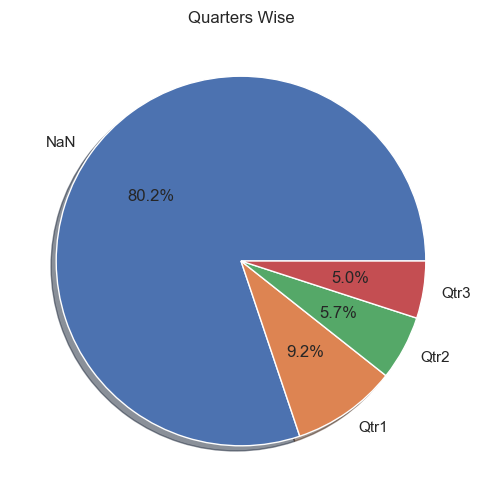

In [57]:
myexplode =[0,0.1]
plt.figure(figsize=(12,6))
plt.title('Quarters Wise')
plt.pie(df['Quarters'].value_counts()/2000*100, 
        labels=df['Quarters'].value_counts().index,
        autopct='%1.1f%%',
        shadow=True,
        wedgeprops={'edgecolor':'w'})

Text(0.5, 1.0, 'All-Over Count in Quaters wise')

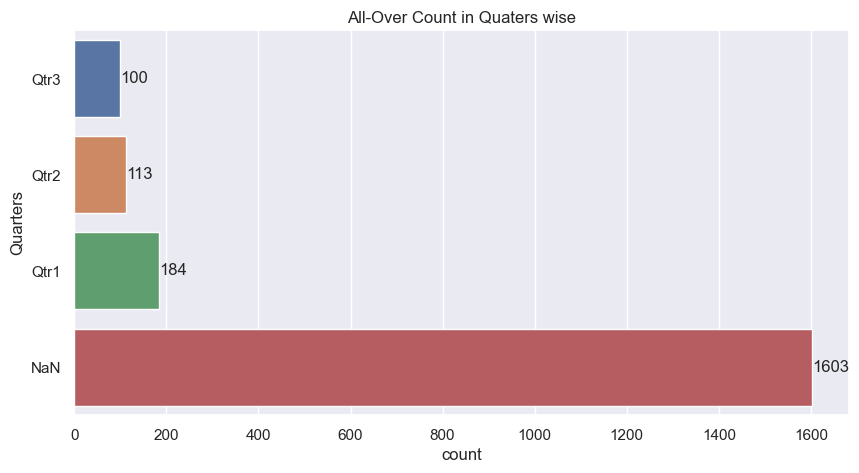

In [58]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(y='Quarters',
                   data=df)
ax.bar_label(ax.containers[0])
plt.title('All-Over Count in Quaters wise')

In [59]:
Publish_Year_Qtrs = df.Publish_Year.value_counts().head(5)

In [60]:
Publish_Year_Qtrs

2015    50
2016    49
2022    47
2019    43
2021    42
Name: Publish_Year, dtype: int64

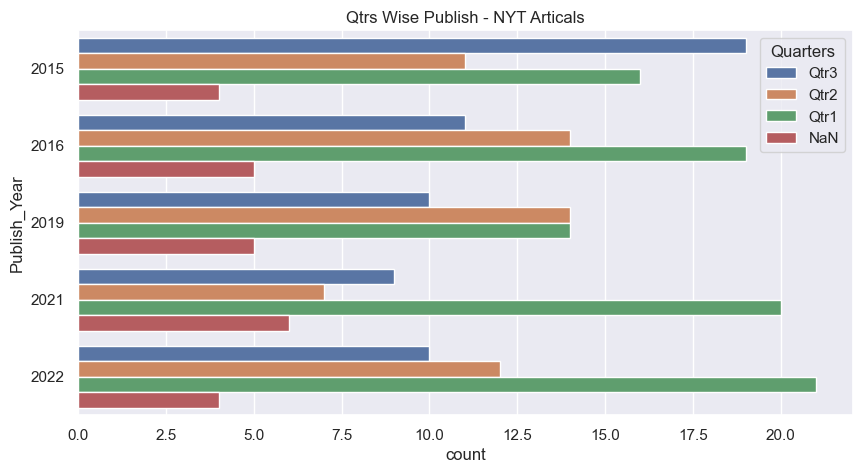

In [61]:
Publish_Year_Qtrs = df.Publish_Year.value_counts().head(5)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(y= "Publish_Year", hue="Quarters", data=df[df.Publish_Year.isin(Publish_Year_Qtrs.index)]
                   .sort_values('Publish_Year',ascending=True))
plt.title('Qtrs Wise Publish - NYT Articals');

In [62]:
bottom_Publish_Year_Qtrs = df.Publish_Year.value_counts().tail(5)

In [63]:
bottom_Publish_Year_Qtrs

2023    22
2012    18
2011    15
2009     4
2010     3
Name: Publish_Year, dtype: int64

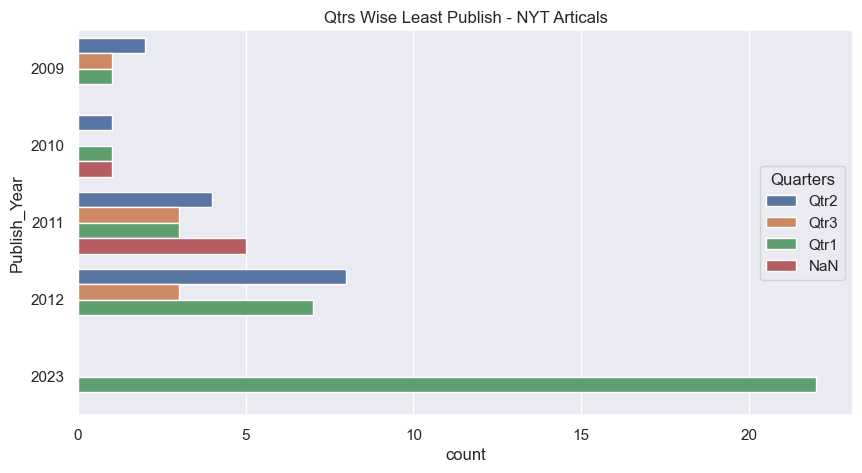

In [64]:
bottom_Publish_Year_Qtrs = df.Publish_Year.value_counts().tail(5)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(y= "Publish_Year", hue="Quarters", data=df[df.Publish_Year.isin(bottom_Publish_Year_Qtrs.index)]
                   .sort_values('Publish_Year',ascending=True))
plt.title('Qtrs Wise Least Publish - NYT Articals');

In [65]:
df.groupby(df['Price_Group']).count()

,Title,Publisher,Author,Description,Contributor,Price,Publish_Year,Best_Seller_Year,Publish_Month,Best_Seller_Month,Quarters
Price_Group,,,,,,,,,,,
0 to 4,1846,956,1845,725,956,1846,429,429,1846,1846,1846
26 to 50,23,23,23,23,23,23,2,2,23,23,23
5 to 25,122,122,122,122,122,122,10,10,122,122,122
51 to 75,1,1,1,1,1,1,0,0,1,1,1
76 to max,8,8,8,8,8,8,1,1,8,8,8


Text(0.5, 1.0, 'Price Grp in Levels - NYT')

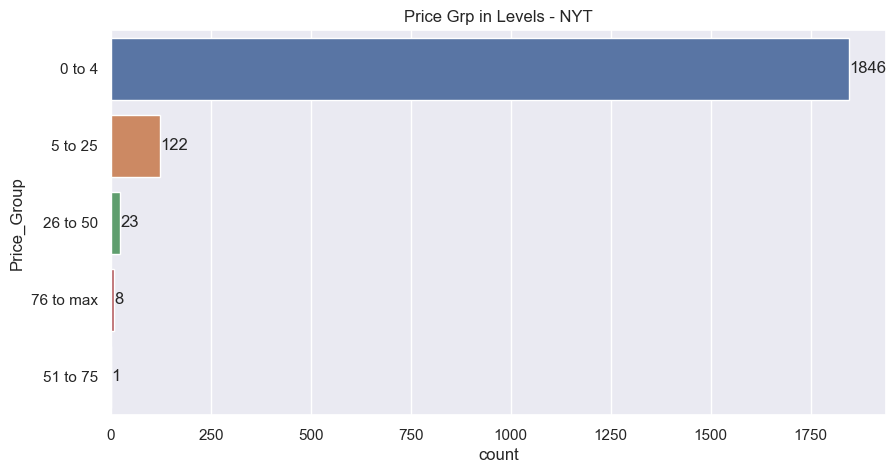

In [66]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(y= "Price_Group",
                   data=df)
ax.bar_label(ax.containers[0])
plt.title('Price Grp in Levels - NYT')

In [67]:
top_price = df.groupby(df['Price']).count().sort_values('Title',ascending=False).head(10)

In [68]:
top_price

,Title,Publisher,Author,Description,Contributor,Publish_Year,Best_Seller_Year,Publish_Month,Best_Seller_Month,Quarters,Price_Group
Price,,,,,,,,,,,
0.00,1838,948,1837,717,948,429,429,1838,1838,1838,1838
7.99,21,21,21,21,21,3,3,21,21,21,21
10.99,13,13,13,13,13,0,0,13,13,13,13
16.99,12,12,12,12,12,2,2,12,12,12,12
12.99,10,10,10,10,10,0,0,10,10,10,10
99.99,8,8,8,8,8,1,1,8,8,8,8
19.99,7,7,7,7,7,0,0,7,7,7,7
17.99,7,7,7,7,7,0,0,7,7,7,7
13.99,6,6,6,6,6,0,0,6,6,6,6


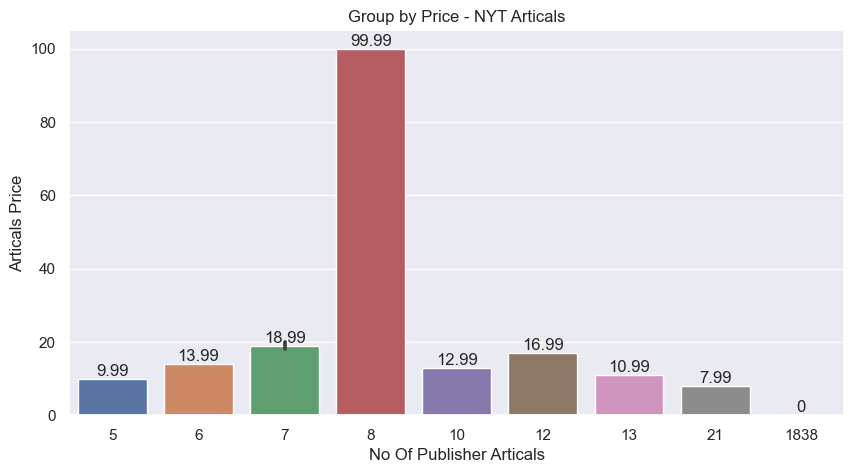

In [69]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_price.Title,y=top_price.Title.index)
ax.bar_label(ax.containers[0])
plt.ylabel('Articals Price');
plt.xlabel('No Of Publisher Articals')
plt.title('Group by Price - NYT Articals');

{'bodies': [<matplotlib.collections.PolyCollection at 0x110870c13d0>],
 'cmeans': <matplotlib.collections.LineCollection at 0x110870c1340>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x110870c1970>,
 'cmins': <matplotlib.collections.LineCollection at 0x110870c1d30>,
 'cbars': <matplotlib.collections.LineCollection at 0x110870cf130>,
 'cmedians': <matplotlib.collections.LineCollection at 0x110870cf4f0>}

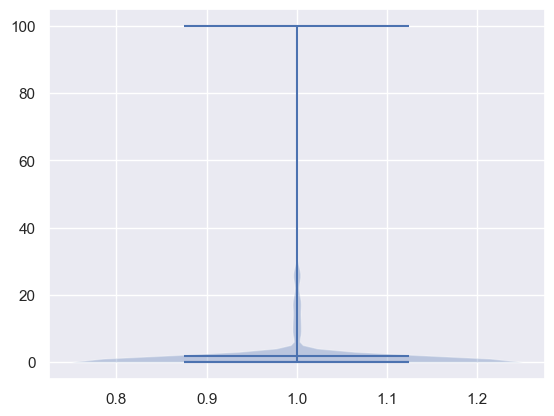

In [70]:
plt.violinplot(df['Price'],showmeans=True,showmedians=True)

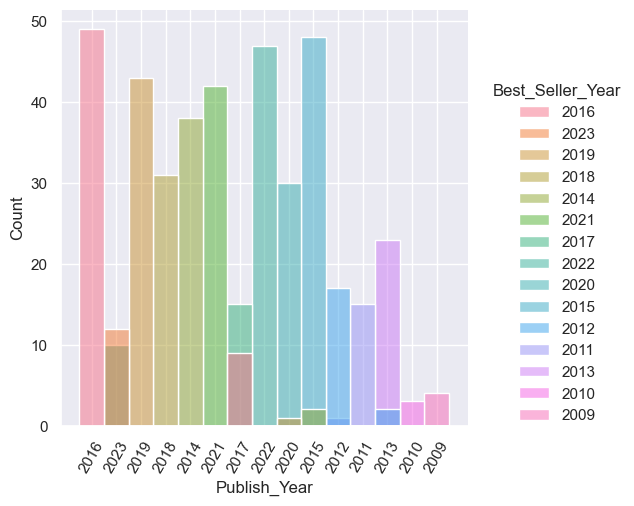

In [71]:
graph = sns.displot(df,x='Publish_Year',hue='Best_Seller_Year')
graph.set_xticklabels(rotation=60)

In [72]:
px.histogram(x='Publish_Year',data_frame=df)

C:\Users\Prakash Jaware\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Prakash Jaware\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



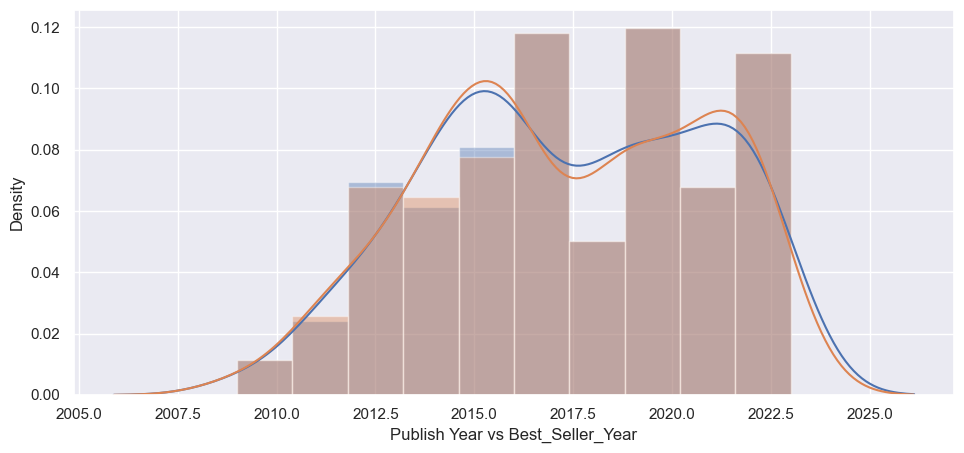

In [73]:
fig = plt.figure(figsize=[25,5])
plt.subplot(1,2,1)
sns.distplot(df['Publish_Year'])
plt.subplot(1,2,1)
sns.distplot(df['Best_Seller_Year'])
plt.xlabel('Publish Year vs Best_Seller_Year');

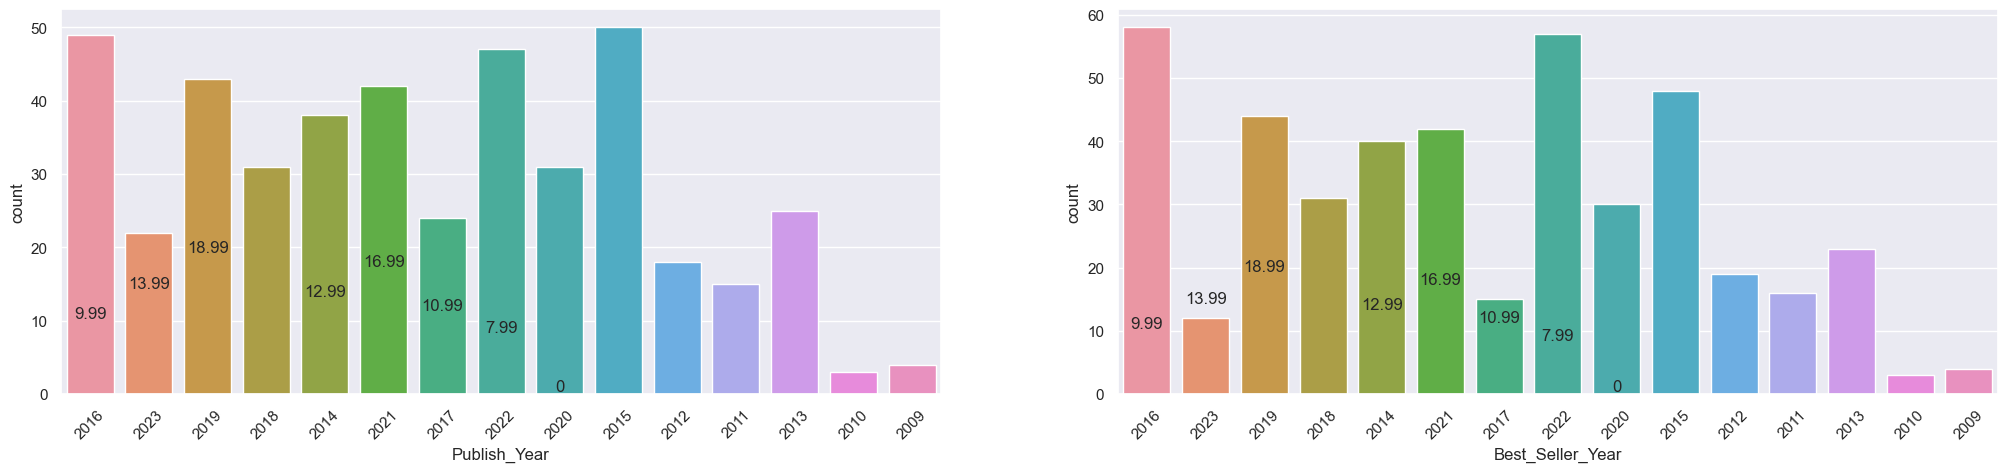

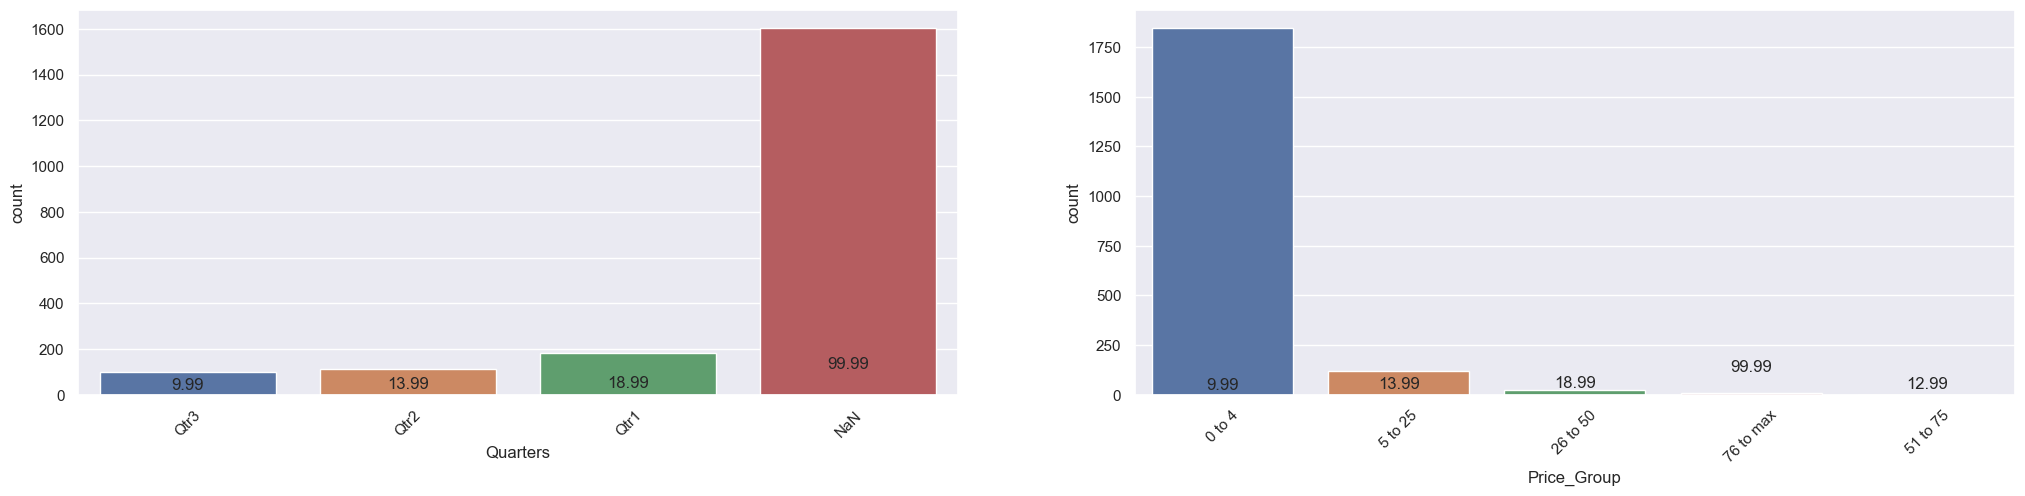

In [74]:
cat_cols = ['Publish_Year','Best_Seller_Year','Quarters','Price_Group']
i=0
while i < 4:
    fig = plt.figure(figsize=[25,5])
    
    
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=45)
    i += 1
    plt.bar_label(ax.containers[0])
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=45)
    i += 1
    plt.bar_label(ax.containers[0])
    
    plt.show()

<AxesSubplot:xlabel='Price_Group', ylabel='Price'>

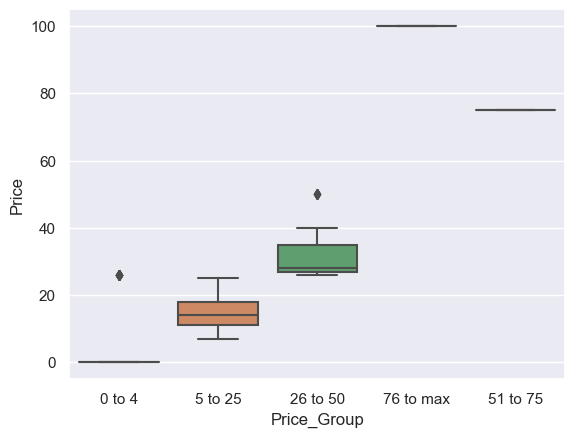

In [75]:
sns.boxplot(data=df,x='Price_Group',y='Price')

In [164]:
grouped_data = df.groupby('Publisher').mean().sort_values("Price",ascending=False).head(10)
grouped_data

,Price
Publisher,
WildStorm,99.990000
Vertigo,73.323333
Artisan,50.000000
DC Comics,49.580588
Del Rey/Ballantine,27.000000
Threshold,27.000000
7YY,25.950000
Portfolio/Penguin,24.975000
Perigee,24.000000


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, 'Perigee'),
  Text(0.0, 0, 'WildStorm'),
  Text(2.0, 0, 'Artisan'),
  Text(4.0, 0, 'Del Rey/Ballantine'),
  Text(6.0, 0, '7YY'),
  Text(8.0, 0, 'Perigee'),
  Text(10.0, 0, '')])

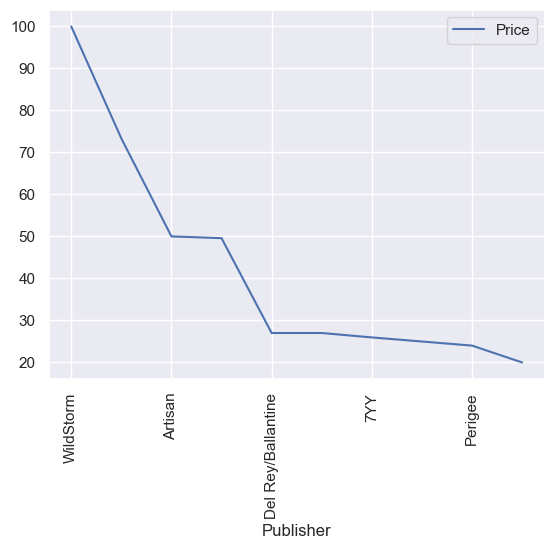

In [165]:
grouped_data.plot()
plt.xticks(rotation=90)

In [166]:
grouped_data.describe()

,Price
count,10.000000
mean,42.180892
std,26.396596
min,19.990000
25%,25.218750
50%,27.000000
75%,49.895147
max,99.990000


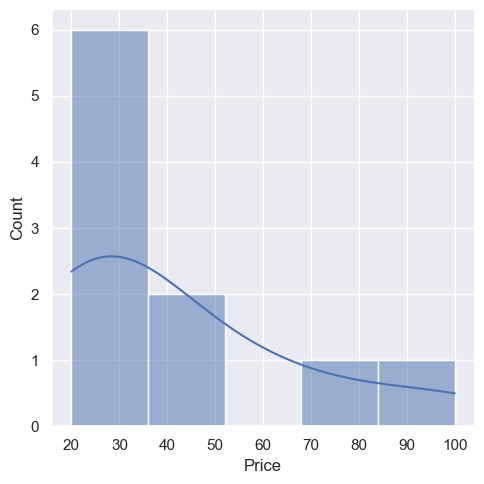

In [170]:
sns.displot(grouped_data['Price'],kde=True)

In [150]:
publisher_price = df[df['Price'] >= 50.0].groupby(df['Publisher']).agg(['mean','max','min'])
publisher_price

C:\Users\Prakash Jaware\AppData\Local\Temp\ipykernel_23380\4272278528.py:1: FutureWarning:

['Title', 'Publisher', 'Author', 'Description', 'Contributor', 'Publish_Year', 'Best_Seller_Year', 'Publish_Month', 'Best_Seller_Month', 'Quarters', 'Price_Group'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Price              
             mean    max    min
Publisher                      
Artisan    50.000  50.00  50.00
DC Comics  95.825  99.99  75.00
Vertigo    99.990  99.99  99.99
WildStorm  99.990  99.99  99.99

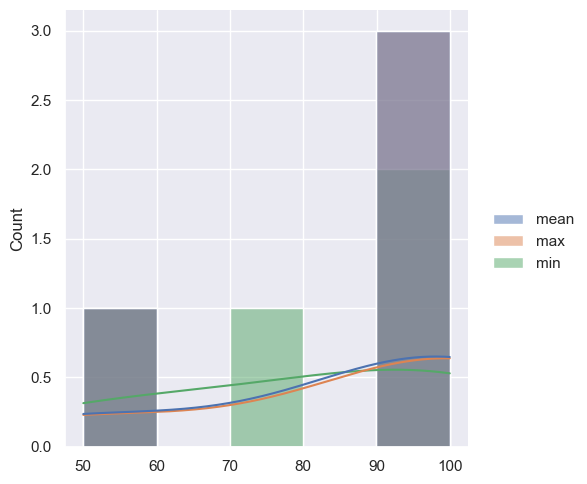

In [169]:
sns.displot(publisher_price['Price'],kde=True)

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

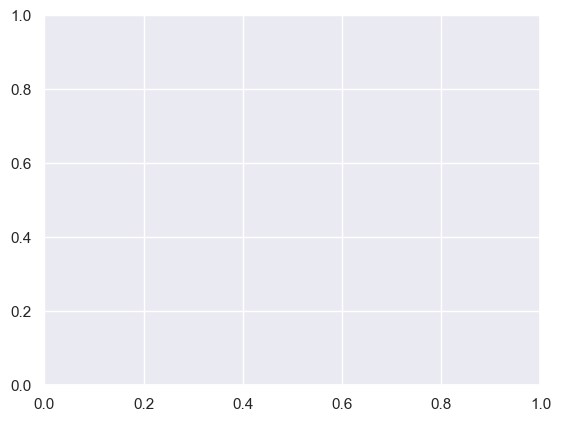

In [174]:
sns.kdeplot(data=publisher_price,x='Publisher')

In [93]:
new_data = df[((df['Publish_Year'] == '2022') | (df['Publish_Year'] == '2016'))]

In [105]:
new_data.groupby(df['Publisher']).mean().sort_values('Price',ascending=True).head()

,Price
Publisher,
Abrams,0.0
Random House Audio,0.0
Random House,0.0
Quayside,0.0
Putnam,0.0
